In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import string
from string import punctuation

In [7]:
#data = pd.read_excel('Dataset.xlsx')

In [8]:
#data.head()

In [9]:
#X = data[["Sentence","Source"]]
#X = np.array(X)
#Y = data[["Pos_Neg"]]
#Y = np.array(Y)

In [10]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)

In [11]:
#trainData = pd.DataFrame(data=X_train,columns=['Sentence','Source'])
#trainData['Pos_Neg']=Y_train

#valData = pd.DataFrame(data=X_val,columns=['Sentence','Source'])
#valData['Pos_Neg']=Y_val

#testData = pd.DataFrame(data=X_test,columns=['Sentence','Source'])
#testData['Pos_Neg']=Y_test

In [12]:
#trainData.head()
#valData.head()
#testData.head()

In [13]:
#trainData.to_excel("Training_Data.xlsx")
#valData.to_excel("Validation_Data.xlsx")
#testData.to_excel("Testing_Data.xlsx")

In [2]:
#Loading Training Data
trainData = pd.read_excel('Training_Data.xlsx')

In [3]:
#Making all lowercase
trainData["Sentence"]=trainData["Sentence"].str.lower()
#Removing punctuation
trainData["Sentence"] = trainData["Sentence"].str.replace(r'[^\w\s]+', '')

#create series from sentences in dataframe, as strings
text = trainData["Sentence"].astype(str)
#convert series to python list
text = text.values.tolist()

#X_train = trainData[["Sentence"]]
#X_train = np.array(X_train, dtype=string)

In [4]:
all_text = ' '.join(text)
# create a list of words
words = all_text.split()
#X_train = X_train.apply(remove_punctuations)
#X_train = trainData[["Sentence"]]
#X_train = np.array(X_train)

from collections import Counter
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [5]:
vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [6]:
text_int = []
for review in text:
    r = [vocab_to_int[w] for w in review.split()]
    text_int.append(r)
print (text_int[0:3])

[[27214, 3084, 6, 3, 309, 19, 26191, 1, 168, 110, 2781, 712, 188, 1, 15226, 24478, 9, 3936, 1026, 9, 13, 62, 1487, 9, 3936, 8, 292, 3, 164, 5, 93, 69, 1522, 1, 2030, 2, 1, 1298, 23, 7361, 4136, 3, 323, 237, 17, 22, 16, 319, 8600, 91655, 83, 41, 91656, 18, 97, 16, 91657, 2176, 83, 38, 2105, 12, 3, 49, 19, 427, 2111], [73, 1, 403, 524, 8, 31, 1886, 6, 3, 10183, 20596, 32, 46, 634, 2, 10396, 8727, 27, 492, 5, 167, 7, 3, 4464, 1420, 14, 91658, 2, 84, 4, 24, 588, 4, 18336, 208, 3849, 98, 3, 165, 224, 32, 5447, 27, 5883, 686, 3, 2926, 42, 5, 3348, 1679, 2, 556, 39, 119, 1, 6149, 241, 1086, 5, 873, 88, 34, 643, 1, 1201, 2, 139, 20, 2541, 289, 5, 754, 7, 111, 2, 4, 266, 5, 139, 888, 12107, 237, 792, 52, 957, 2, 110, 24, 671, 2, 24, 1609, 1360, 23, 51, 70, 41847, 21, 64, 1, 3388, 29433, 12, 647, 10, 483, 6, 14, 1088, 14, 44, 9, 58, 365, 21, 1, 263, 9, 74, 56, 8455, 971, 7, 3, 4370, 4, 797, 8529, 1, 62, 623, 96, 21, 97, 38, 10, 17, 6, 44, 314, 33, 4831, 741, 41, 25, 10, 612, 4872, 16, 91659, 898

In [17]:
trainLabels = np.array(trainData["Pos_Neg"])
train_Y = trainLabels

ValueError: setting an array element with a sequence.

In [8]:
type(text_int)

list

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

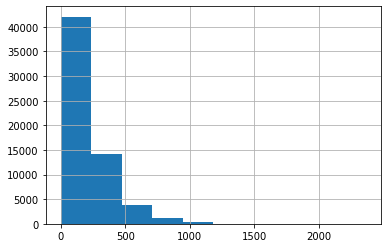

count    61648.000000
mean       226.284924
std        173.460319
min          1.000000
25%        123.000000
50%        170.000000
75%        278.000000
max       2360.000000
dtype: float64

In [10]:
text_len = [len(x) for x in text_int]
pd.Series(text_len).hist()
plt.show()
pd.Series(text_len).describe()

In [12]:
text_int = [ text_int[i] for i, l in enumerate(text_len) if l>0 ]
trainLabels = [ trainLabels[i] for i, l in enumerate(text_len) if l> 0 ]

In [15]:
def pad_features(text_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(text_int), seq_length), dtype = int)
    
    for i, review in enumerate(text_int):
        text_len = len(review)
        
        if text_len <= seq_length:
            zeroes = list(np.zeros(seq_length-text_len))
            new = zeroes+review
        elif text_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features
###Mess around with seq_length
seq_length = 200
features = pad_features(text_int, seq_length)

In [16]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_X), torch.from_numpy(train_Y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

array([[   0,    0,    0, ...,   19,  427, 2111],
       [  73,    1,  403, ...,    4,   10,  415],
       [   9,  183,   10, ..., 1183,    3, 1612],
       ...,
       [   0,    0,    0, ...,   17,  463,  334],
       [ 173,    1,   62, ..., 6514,    7,    1],
       [  10,    6,    3, ...,  760,    2,  774]])

In [6]:
import torch
from torch.utils.data import DataLoader, TensorDataset
train_data = TensorDataset(torch.from_numpy(train_X), torch.from_numpy(trainLabels))

TypeError: expected np.ndarray (got Series)

In [7]:
###START HERE###

import torch
from torchtext import data

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy')
LABEL = data.LabelField(dtype = torch.float)

In [8]:
trainData = pd.read_excel('Training_Data.xlsx')


In [9]:
train_X = trainData["Sentence"].astype(str)
for i in range(0,len(train_X)):
    train_X[i] = [word for word in line.split()]
train_Y = trainData["Pos_Neg"]

NameError: name 'line' is not defined

In [28]:
MAX_VOCAB_SIZE = 25000

TEXT.build_vocab(train_X, max_size = MAX_VOCAB_SIZE)
LABEL.build_vocab(train_X)

In [32]:
type(TEXT.vocab)

torchtext.vocab.Vocab

In [33]:
print(vars(train_X[0]))

TypeError: vars() argument must have __dict__ attribute